In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### 데이터 설명
- 핸드폰을 활용하여 인간의 활동을 3축 가속도계로 측정.
- 타겟 라벨은 아래와 같음
    1. 계단 올라가기
    2. 일어서있기
    3. 계단 내려가기
    4. 앉아있기
    5. 누워있기
    6. 걷기
- 피쳐는 561개임.
- 피쳐를 활용하여 랜덤포레스트로 분류하는 코드임

In [11]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

X_train = pd.read_csv(X_train_url,sep='\s+',header=None)
X_test = pd.read_csv(X_test_url,sep='\s+',header=None)
y_train = pd.read_csv(y_train_url,sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(y_test_url,sep='\s+',header=None,names=['action'])
cat_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
cat = pd.read_csv(cat_url,sep='\s+',header=None)

#### 랜덤포레스트의 하이퍼파리미터 얻기 위한 GridCV

In [ ]:
params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=13,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [31]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values(by='rank_test_score',ascending=True)

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10
32,5,0.912541,200,10
29,7,0.912405,200,10
26,7,0.912405,200,10
27,9,0.912269,50,10
24,9,0.912269,50,10


In [34]:
print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.9151251360174102


In [35]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train,y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test,pred1)

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9205972175093315

#### 중요변수 찾기

In [48]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values,index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
# X_test.iloc[top20_cols.index]
top20_cols

558    0.034638
50     0.032518
56     0.031309
40     0.029513
52     0.027775
49     0.027662
559    0.026553
41     0.026052
53     0.023037
57     0.018678
42     0.015688
560    0.012837
271    0.012558
9      0.011970
393    0.011803
102    0.011647
214    0.011451
96     0.011333
73     0.011257
353    0.011040
dtype: float64

In [68]:
df = pd.concat([cat.iloc[top20_cols.index][1],top20_cols],axis=1)
df.columns = ['feature','importance']
df

,feature,importance
558,"angle(X,gravityMean)",0.034638
50,tGravityAcc-max()-Y,0.032518
56,tGravityAcc-energy()-X,0.031309
40,tGravityAcc-mean()-X,0.029513
52,tGravityAcc-min()-X,0.027775
49,tGravityAcc-max()-X,0.027662
559,"angle(Y,gravityMean)",0.026553
41,tGravityAcc-mean()-Y,0.026052
53,tGravityAcc-min()-Y,0.023037
57,tGravityAcc-energy()-Y,0.018678


<AxesSubplot:xlabel='importance', ylabel='feature'>

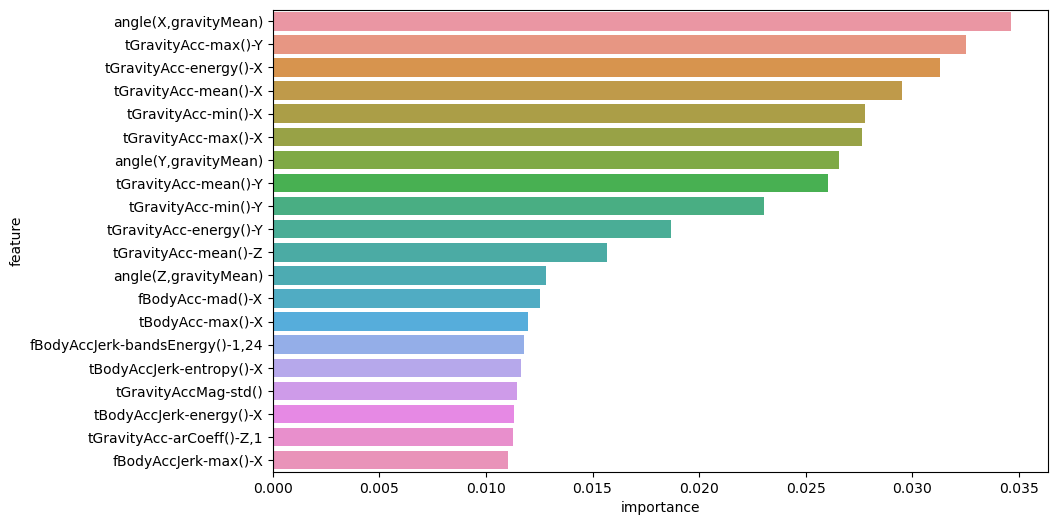

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['importance'],y=df['feature'])

#### 중요변수를 걸러내어 성능과 속도의 트레이드오프를 체험하자
- 상위 20개 특성만 가지고 다시 성능 확인
- 성능은 낮아졌지만 연산속도가 빨라졌다.

In [86]:
X_train_re = X_train[df.index]
X_test_re = X_test[df.index]

rf_clf_best.fit(X_train_re,y_train)

y_pred_ts = rf_clf_best.predict(X_test_re)

accuracy_score(y_pred_ts,y_test)

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8113335595520869

In [83]:
y_train.values.reshape(-1,)
y_train.values

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]])